<a href="https://colab.research.google.com/github/zqiaohe/100daysofcode/blob/master/Ranging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Подготовка данных

В результате стемминга мы имеем три датасета: 

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import nltk 
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [0]:
import pandas as pd
import numpy as np

##1) Оригинальный датасет

>>[Датасет](https://)

In [0]:
orig_train = pd.read_csv('drive/My Drive/CupITdatasets/Ranging/Original/train_data.csv')
orig_test =  pd.read_csv('drive/My Drive/CupITdatasets/Ranging/Original/test_data.csv')


In [0]:
orig_train.head()

,Unnamed: 0,title,text,score
0,0,Просьба об отмене штрафа КАСКО,Здравствуйте! 10.06.2016г. мною был заключен д...,Позитивный
1,1,"В целом хорошо, работали по ипотеке.","Брала ипотеку в юникоре, порадовали квалифика...",Негативный
2,2,Нас всегда выручает банк Уралсиб!,Знакомство с банком началось с ипотеки в 2009 ...,Позитивный
3,3,Абсолютно неприемлемая ситуация и ее решение,Клиент Совкомбанка с 2017 года. В феврале 2018...,Позитивный
4,4,Внёс не туда,Пришёл оплачивать кредит и ошибочно внёс деньг...,Позитивный


In [0]:
orig_test.head()

,Unnamed: 0,title,text
0,0,Благодарность менеджеру по продажам,Хотелось бы выразить огромную благодарность ме...
1,1,Брал рассрочку в магазине Самсунг,Здравствуйте Брал рассрочку в магазине Самсунг...
2,2,Тинькофф оказался лучшим,Работаем с ними уже более 2х лет. Основное что...
3,3,Недавно открыла расчетный счет в Тинькофф Банке,Здравствуйте!Не так давно по рекомендации знак...
4,4,Волею судеб у меня появилась кредитная карта С...,"Сам работаю в крупном банке и знаю, как сложно..."


##2)  датасет со стеммингом в nltk

>>[Ноутбук](https://github.com/zqiaohe/100daysofcode/blob/master/NLTKdataset.ipynb) 

>>[Датасет](https://drive.google.com/open?id=19lDA3C-6YvihW5xyNZuKBwSypUeqyYHc) 


In [0]:
nltk_train = pd.read_csv('drive/My Drive/CupITdatasets/Ranging/nltkdata/nltktraindata.csv')
nltk_test = pd.read_csv('drive/My Drive/CupITdatasets/Ranging/nltkdata/nltktestdata.csv')

In [0]:
nltk_train.head()

,title,text,score
0,просьб отмен штраф каск,здравств 10 06 2016г мно заключ договор №с0410...,Позитивный
1,цел работа ипотек,брал ипотек юникор порадова квалификац внимате...,Негативный
2,выруча банк уралсиб,знакомств банк нача ипотек 2009 год взял авток...,Позитивный
3,абсолютн неприемлем ситуац решен,клиент совкомбанк 2017 год в феврал 2018 год ...,Позитивный
4,внес туд,пришел оплачива кред ошибочн внес деньг кредит...,Позитивный


In [0]:
nltk_test.head()

,title,text
0,благодарн менеджер продаж,хотел выраз огромн благодарн менеджер продаж ф...
1,брал рассрочк магазин самсунг,здравствуйте бра рассрочк магазин самсунг твер...
2,тинькофф оказа лучш,работа ним 2х лет основн рад эт бюрократическ ...
3,недавн откр расчетн счет тинькофф банк,здравств давн рекомендац знаком (тож ип) откр ...
4,вол судеб появ кредитн карт ситибанк аэрофлот ...,работа крупн банк зна сложн организова достойн...


##3)  датасет со стеммингом средствами библиотеки pymystem

>>[Ноутбук](https://github.com/zqiaohe/100daysofcode/blob/master/Mystem_preprocess_data.ipynb) 

>>[Датасет](https://drive.google.com/open?id=1_i6LdRzEB_N-LNRH5kAwKOOf60qdxpcW) 




In [0]:
stem_train = pd.read_csv('drive/My Drive/CupITdatasets/Ranging/mystemdata/train.csv')
stem_test = pd.read_csv('drive/My Drive/CupITdatasets/Ranging/mystemdata/test.csv')

In [0]:
stem_train.head()

,Unnamed: 0,title,text,score
0,0,просьба отмена штраф каско,здравствовать 10.06 2016г заключать договор № ...,Позитивный
1,1,целое работать ипотека,брать ипотека юникор порадовать квалификация в...,Негативный
2,2,выручать банк уралсиб,знакомство банк начинаться ипотека 2009 год вз...,Позитивный
3,3,абсолютно неприемлемый ситуация решение,клиент совкомбанк 2017 год февраль 2018 год от...,Позитивный
4,4,вносить туда,приходить оплачивать кредит ошибочно вносить д...,Позитивный


In [0]:
stem_test.head()

,Unnamed: 0,title,text
0,0,благодарность менеджер продажа,хотеться выражать огромный благодарность менед...
1,1,брать рассрочка магазин самсунг,здравствовать брать рассрочка магазин самсунг ...
2,2,тинькофф оказываться хороший,работать 2х год основной радовать это бюрократ...
3,3,недавно открывать расчетный счет тинькофф банк,здравствовать давно рекомендация знакомый ипат...
4,4,воля судьба появляться кредитный карта ситибан...,работать крупный банк знать сложно организовыв...


#TF-IDF и облака слов для каждого датасета

In [0]:
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from nltk.corpus import stopwords

from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [0]:
stop_words=stopwords.words('russian')

In [0]:
#Инициализируем tf_idf модель векторного представления текста

tf_idf = TfidfVectorizer(ngram_range=(1, 10), stop_words=stopwords.words('russian'), 
                         analyzer='word',
                         max_df=0.855, 
                         min_df=0.01,
                         max_features=10000
                        )

##OriginalDataset

In [0]:
%%time
orig_tf_idf_model = tf_idf.fit(np.concatenate([orig_train['text'], orig_test['text']]))

CPU times: user 57.7 s, sys: 3.29 s, total: 1min
Wall time: 1min


In [0]:
%%time
orig_train_tf_idf_vec = orig_tf_idf_model.transform(orig_train['text'])
orig_test_tf_idf_vec = orig_tf_idf_model.transform(orig_test['text'])

CPU times: user 11.2 s, sys: 0 ns, total: 11.2 s
Wall time: 11.2 s


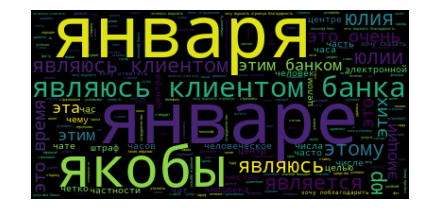

In [0]:
wordcloud = WordCloud().generate_from_frequencies(orig_tf_idf_model.vocabulary_)

# Display the generated image:
plt.figure() 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.margins(x=0, y=0) 
plt.tight_layout()
plt.show() 

##NltkDataset

In [0]:
%%time
nltk_tf_idf_model = tf_idf.fit(np.concatenate([nltk_test['text'], nltk_train['text']]))

CPU times: user 56.3 s, sys: 2.07 s, total: 58.4 s
Wall time: 58.4 s


In [0]:
%%time
nltk_train_tf_idf_vec = nltk_tf_idf_model.transform(nltk_train['text'])
nltk_test_tf_idf_vec = nltk_tf_idf_model.transform(nltk_test['text'])

CPU times: user 10.7 s, sys: 7.12 ms, total: 10.7 s
Wall time: 10.7 s


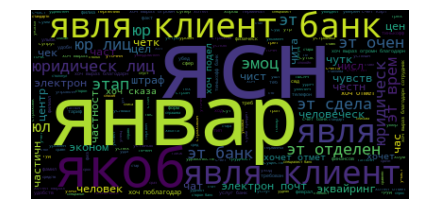

In [0]:
wordcloud = WordCloud().generate_from_frequencies(nltk_tf_idf_model.vocabulary_)

# Display the generated image:
plt.figure() 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.margins(x=0, y=0) 
plt.tight_layout()
plt.show() 

##MystemDataset

In [0]:
%%time
ms_tf_idf_model = tf_idf.fit(np.concatenate([stem_test['text'].values.astype('U'), stem_train['text'].values.astype('U')]))

CPU times: user 58.4 s, sys: 1.64 s, total: 1min
Wall time: 1min


In [0]:
ms_train_tf_idf_vec = ms_tf_idf_model.transform(stem_train['text'].values.astype('U'))
ms_test_tf_idf_vec = ms_tf_idf_model.transform(stem_test['text'].values.astype('U'))

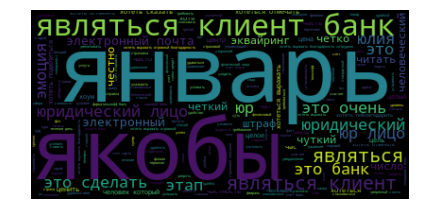

In [0]:
wordcloud = WordCloud().generate_from_frequencies(ms_tf_idf_model.vocabulary_)

# Display the generated image:
plt.figure() 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.margins(x=0, y=0) 
plt.tight_layout()
plt.show() 

#Logregression

In [0]:
lm = LogisticRegression(#solver='newton-cg', 
                        #n_jobs=-1,
                        #solver='lbfgs',
                        penalty='l2',
                        #tol=0.000000001,
                        random_state=42,
                        C=10, 
                        max_iter=100000)

In [0]:
lm_params = {'penalty':['l1', 'l2'],
             'C':[0.001, 0.01, 0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 2, 5, 10, 20, 100],
             #'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
             'tol' : [10, 1, 0.1, 0.01, 0.001, 0.0001, 0.0001]
    
    
}
lm_search = GridSearchCV(estimator=lm, 
                         param_grid=lm_params, 
                         scoring ='roc_auc', 
                         cv=StratifiedKFold(10), 
                         n_jobs=-1,
                         verbose=1)

##OriginalDataset

In [0]:
%%time
lm_search_fitted = lm_search.fit(X=orig_train_tf_idf_vec, y=pd.factorize(orig_train.score)[0])

Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 1065 tasks      | elapsed:   43.3s


CPU times: user 3.08 s, sys: 504 ms, total: 3.58 s
Wall time: 1min 56s


[Parallel(n_jobs=-1)]: Done 1960 out of 1960 | elapsed:  1.9min finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
lm_search_fitted.best_estimator_

LogisticRegression(C=1.2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.1, verbose=0, warm_start=False)

In [0]:
pred_scores = cross_val_score(estimator=lm_search_fitted.best_estimator_, X=orig_train_tf_idf_vec, y=pd.factorize(orig_train.score)[0],
                scoring='roc_auc',  
                cv=10, #stratified by default
                n_jobs=-1)
display(np.mean(pred_scores))

0.9167126581671414

##NLTKDataset

In [0]:
%%time
nltk_lm_search_fitted = lm_search.fit(X=nltk_train_tf_idf_vec, y=pd.factorize(nltk_train.score)[0])

Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 1156 tasks      | elapsed:   56.1s
[Parallel(n_jobs=-1)]: Done 1901 tasks      | elapsed:  2.1min


CPU times: user 3.31 s, sys: 301 ms, total: 3.61 s
Wall time: 2min 14s


[Parallel(n_jobs=-1)]: Done 1960 out of 1960 | elapsed:  2.2min finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
nltk_lm_search_fitted.best_estimator_

LogisticRegression(C=1.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.1, verbose=0, warm_start=False)

In [0]:
pred_scores = cross_val_score(estimator=nltk_lm_search_fitted.best_estimator_, X=nltk_train_tf_idf_vec, y=pd.factorize(nltk_train.score)[0],
                scoring='roc_auc',  
                cv=10, #stratified by default
                n_jobs=-1)
display(np.mean(pred_scores))

0.9195656504212705

##MystemDataset

In [0]:
%%time
stem_lm_search_fitted = lm_search.fit(X=ms_train_tf_idf_vec, y=pd.factorize(stem_train.score)[0])

Fitting 10 folds for each of 196 candidates, totalling 1960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 1156 tasks      | elapsed:   56.8s
[Parallel(n_jobs=-1)]: Done 1925 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1957 out of 1960 | elapsed:  2.2min remaining:    0.2s


CPU times: user 4.13 s, sys: 295 ms, total: 4.42 s
Wall time: 2min 16s


[Parallel(n_jobs=-1)]: Done 1960 out of 1960 | elapsed:  2.3min finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
stem_lm_search_fitted.best_estimator_

LogisticRegression(C=1.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.01, verbose=0, warm_start=False)

In [0]:
pred_scores = cross_val_score(estimator=stem_lm_search_fitted.best_estimator_, X=ms_train_tf_idf_vec, y=pd.factorize(stem_train.score)[0],
                scoring='roc_auc',  
                cv=10, #stratified by default
                n_jobs=-1)
display(np.mean(pred_scores))

0.9201192915751537

#Naive Bayes

##GaussianNB

In [0]:
from sklearn.naive_bayes import GaussianNB

In [0]:
modelgnb = GaussianNB()

In [0]:
gnb_params = {'var_smoothing':[0.0000001, 0.000001,0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]       
            }

In [0]:
gnb_search = GridSearchCV(estimator=modelgnb, param_grid=[gnb_params], cv=StratifiedKFold(10), refit=True)

###Original Dataset

In [0]:
%%time
gnb_search_fitted = gnb_search.fit(X=orig_train_tf_idf_vec.todense(), y=pd.factorize(orig_train.score)[0])

CPU times: user 1min, sys: 2.27 s, total: 1min 2s
Wall time: 1min 2s


In [0]:
gnb_search_fitted.best_estimator_

GaussianNB(priors=None, var_smoothing=1e-07)

In [0]:
pred_scores = cross_val_score(estimator=gnb_search_fitted.best_estimator_, X=orig_train_tf_idf_vec.todense(), y=pd.factorize(orig_train.score)[0],
                scoring='roc_auc',  
                cv=10, #stratified by default
                n_jobs=-1)
display(np.mean(pred_scores))

0.8485368783094727

###NLTKDataset

In [0]:
%%time
nltk_gnb_search_fitted = gnb_search.fit(X=nltk_train_tf_idf_vec.todense(), y=pd.factorize(nltk_train.score)[0])

CPU times: user 29.7 s, sys: 1.04 s, total: 30.7 s
Wall time: 30.7 s


In [0]:
nltk_gnb_search_fitted.best_estimator_

GaussianNB(priors=None, var_smoothing=2.0)

In [0]:
pred_scores = cross_val_score(estimator=nltk_gnb_search_fitted.best_estimator_, X=nltk_train_tf_idf_vec.todense(), y=pd.factorize(nltk_train.score)[0],
                scoring='roc_auc',  
                cv=10, #stratified by default
                n_jobs=-1)
display(np.mean(pred_scores))

0.8905240240582477

###MystemDataset

In [0]:
%%time
stem_gnb_search_fitted = gnb_search.fit(X=ms_train_tf_idf_vec.todense(), y=pd.factorize(stem_train.score)[0])

CPU times: user 27.8 s, sys: 1.62 s, total: 29.4 s
Wall time: 29.4 s


In [0]:
%%time
stem_gnb_search_fitted.best_estimator_

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 11.9 µs


GaussianNB(priors=None, var_smoothing=0.0001)

In [0]:
%%time
pred_scores = cross_val_score(estimator=stem_gnb_search_fitted.best_estimator_, X=ms_train_tf_idf_vec.todense(), y=pd.factorize(stem_train.score)[0],
                scoring='roc_auc',  
                cv=10, #stratified by default
                n_jobs=-1)
display(np.mean(pred_scores))

0.854758589706619

CPU times: user 2.66 s, sys: 862 ms, total: 3.52 s
Wall time: 6.23 s


##BernoulliNB

In [0]:
from sklearn.naive_bayes import BernoulliNB

In [0]:
modelbnb = BernoulliNB()

In [0]:
bnb_params = {'alpha': [0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027, 0.028, 0.029, 0.03, 0.031, 0.033,0.035,0.037, 0.04],
             'fit_prior':[True, False],
             'binarize':[None, 0.0,0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]             
            }

In [0]:
bnb_search = GridSearchCV(estimator=modelbnb, param_grid=[bnb_params],scoring='roc_auc', refit=True, cv=5)

###OriginalDataset

In [0]:
%%time
bnb_search_fitted = bnb_search.fit(X=orig_train_tf_idf_vec, y=pd.factorize(orig_train.score)[0])

CPU times: user 1min 17s, sys: 6.87 s, total: 1min 24s
Wall time: 1min 24s


In [0]:
bnb_search_fitted.best_estimator_

BernoulliNB(alpha=0.021, binarize=None, class_prior=None, fit_prior=True)

In [0]:
pred_scores = cross_val_score(estimator=bnb_search_fitted.best_estimator_, X=orig_train_tf_idf_vec, y=pd.factorize(orig_train.score)[0],
                scoring='roc_auc',  
                cv=10, #stratified by default
                n_jobs=-1)
display(np.mean(pred_scores))

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


0.9002538187604852

###NltkDataset

In [0]:
%%time
nltk_bnb_search_fitted = bnb_search.fit(X=nltk_train_tf_idf_vec, y=pd.factorize(nltk_train.score)[0])

CPU times: user 1min 29s, sys: 6.72 s, total: 1min 36s
Wall time: 1min 36s


In [0]:
nltk_bnb_search_fitted.best_estimator_

BernoulliNB(alpha=0.021, binarize=None, class_prior=None, fit_prior=True)

In [0]:
pred_scores = cross_val_score(estimator=nltk_bnb_search_fitted.best_estimator_, X=nltk_train_tf_idf_vec, y=pd.factorize(nltk_train.score)[0],
                scoring='roc_auc',  
                cv=10, #stratified by default
                n_jobs=-1)
display(np.mean(pred_scores))

0.9010493823804607

###MystemDataset

In [0]:
%%time
stem_bnb_search_fitted = bnb_search.fit(X=ms_train_tf_idf_vec.todense(), y=pd.factorize(stem_train.score)[0])

KeyboardInterrupt: ignored

In [0]:
%%time
stem_bnb_search_fitted.best_estimator_

In [0]:
%%time
pred_scores = cross_val_score(estimator=stem_bnb_search_fitted.best_estimator_, X=ms_train_tf_idf_vec.todense(), y=pd.factorize(stem_train.score)[0],
                scoring='roc_auc',  
                cv=10, #stratified by default
                n_jobs=-1)
display(np.mean(pred_scores))

#Word2Vec

In [0]:
!pip install --upgrade gensim

    100% |████████████████████████████████| 24.2MB 1.9MB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [0]:
from gensim.corpora import Dictionary
from gensim.models.tfidfmodel import TfidfModel
from gensim.matutils import sparse2full
from gensim.models import word2vec

##Mystem Dataset

In [0]:
stem_train['text'].head()

0    здравствовать 10.06 2016г заключать договор № ...
1    брать ипотека юникор порадовать квалификация в...
2    знакомство банк начинаться ипотека 2009 год вз...
3    клиент совкомбанк 2017 год февраль 2018 год от...
4    приходить оплачивать кредит ошибочно вносить д...
Name: text, dtype: object

In [0]:
from nltk.tokenize import ToktokTokenizer

In [0]:
tok =  ToktokTokenizer()

In [0]:
stem_train['tokenize_text'] = [tok.tokenize(tokens) for tokens in stem_train['text']]

In [0]:
stem_train['tokenize_text'].head()

0    [здравствовать, 10.06, 2016г, заключать, догов...
1    [брать, ипотека, юникор, порадовать, квалифика...
2    [знакомство, банк, начинаться, ипотека, 2009, ...
3    [клиент, совкомбанк, 2017, год, февраль, 2018,...
4    [приходить, оплачивать, кредит, ошибочно, внос...
Name: tokenize_text, dtype: object

In [0]:
stem_test['tokenize_text']=[tok.tokenize(tokens) for tokens in stem_test['text']]

In [0]:
testmodel = word2vec.Word2Vec(stem_train['tokenize_text'], size=300, window=3, workers=4)

In [0]:
model = word2vec.Word2Vec(stem_train['tokenize_text'], size=300, window=3, workers=4)

In [0]:
w2v = dict(zip(model.wv.index2word, model.wv.syn0))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  """Entry point for launching an IPython kernel.


In [0]:
testw2v = dict(zip(testmodel.wv.index2word,testmodel.wv.syn0))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  """Entry point for launching an IPython kernel.


In [0]:
class mean_vectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.dim = len(next(iter(w2v.values())))

    def fit(self, X):
        return self 

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec] 
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

In [0]:
data_mean=mean_vectorizer(w2v).fit(stem_train['tokenize_text']).transform(stem_train['tokenize_text'])
data_mean.shape

(10000, 300)

In [0]:
test_data = mean_vectorizer(testw2v).fit(stem_test['tokenize_text']).transform(stem_test['tokenize_text'])

In [0]:
# Воспользуемся валидацией
def split(stem_train,y,ratio):
    idx = round(stem_train.shape[0] * ratio)
    return stem_train[:idx, :], stem_train[idx:, :], y[:idx], y[idx:]
y = pd.factorize(stem_train.score)[0]
Xtr, Xval, ytr, yval = split(data_mean, y,0.9)
Xtr.shape,Xval.shape,ytr.mean(),yval.mean()

((9000, 300), (1000, 300), 0.25933333333333336, 0.241)

In [0]:
train_mean=mean_vectorizer(w2v).fit(stem_train['tokenize_text']).transform(stem_train['tokenize_text'])
test_mean=mean_vectorizer(testw2v).fit(stem_test['tokenize_text']).transform(stem_test['tokenize_text'])

In [0]:
y = stem_train['score']
Xtr, Xval, ytr, yval = split(train_mean, y,0.9)
Xtr.shape,Xval.shape,ytr.mean(),yval.mean()

((9000, 300), (1000, 300), 0.7406666666666667, 0.759)

#keras

In [0]:
# подключим библиотеки keras 
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Input
from keras.preprocessing.text import Tokenizer
from keras import regularizers

Using TensorFlow backend.


In [0]:
# опишем нейронную сеть
model = Sequential()
model.add(Dense(128, input_dim=(Xtr.shape[1])))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['binary_accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
history = model.fit(Xtr, ytr,
                    batch_size=64,
                    epochs=200,
                    validation_data=(Xval, yval),
                    class_weight='auto',
                    verbose=0)

Instructions for updating:
Use tf.cast instead.


In [0]:
from sklearn.metrics import roc_auc_score

In [0]:
classes = model.predict(Xval, batch_size=128)
roc_auc_score(yval, classes)

0.9202652540195387

In [0]:
import xgboost as xgb

In [0]:
dtest = xgb.DMatrix(test_data)

In [0]:
dtr = xgb.DMatrix(Xtr, label= ytr,missing = np.nan)
dval = xgb.DMatrix(Xval, label= yval,missing = np.nan)

watchlist = [(dtr, 'train'), (dval, 'eval')]
history = dict()

In [0]:
params = {
    'max_depth': 26,
    'eta': 0.025,
    'nthread': 4,
    'gamma' : 1,
    'alpha' : 1,
    'subsample': 0.8,
    'eval_metric': ['auc'],
    'objective': 'binary:logistic',
    'colsample_bytree': 0.5,
    'min_child_weight': 100,
    'scale_pos_weight':(1)/y.mean(),
    'seed':7,
}

In [0]:
model_new = xgb.train(params, dtr, num_boost_round=600, evals=watchlist, evals_result=history, verbose_eval=20)

[0]	train-auc:0.87947	eval-auc:0.877536
[20]	train-auc:0.908714	eval-auc:0.901776
[40]	train-auc:0.913103	eval-auc:0.903701
[60]	train-auc:0.917072	eval-auc:0.906106
[80]	train-auc:0.920815	eval-auc:0.906008
[100]	train-auc:0.923973	eval-auc:0.906647
[120]	train-auc:0.927245	eval-auc:0.908386
[140]	train-auc:0.930405	eval-auc:0.909047
[160]	train-auc:0.933637	eval-auc:0.910507
[180]	train-auc:0.936397	eval-auc:0.910704
[200]	train-auc:0.93892	eval-auc:0.911677
[220]	train-auc:0.941211	eval-auc:0.912131
[240]	train-auc:0.943532	eval-auc:0.912661
[260]	train-auc:0.945829	eval-auc:0.912945
[280]	train-auc:0.948055	eval-auc:0.913464
[300]	train-auc:0.949899	eval-auc:0.9137
[320]	train-auc:0.95182	eval-auc:0.91417
[340]	train-auc:0.953623	eval-auc:0.914399
[360]	train-auc:0.955311	eval-auc:0.914864
[380]	train-auc:0.956915	eval-auc:0.915137
[400]	train-auc:0.958402	eval-auc:0.915629
[420]	train-auc:0.959775	eval-auc:0.915695
[440]	train-auc:0.961199	eval-auc:0.915624
[460]	train-auc:0.96254

In [0]:
model_new

In [0]:
classes = model_new.predict(dval)
roc_auc_score(yval, classes)


0.9155145173546761

In [0]:
classes = model_new.predict(dval)

In [0]:
classes = model_new.predict(dtest)

In [0]:
sub = pd.DataFrame({'index': range(0, len(classes)),
                    'score':classes})
sub.to_csv('xgboost.csv', index=False)